In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/realstate_file.csv')

In [5]:
df.head()

,Property Type,Listing Status,Building Size(sq. m),Year Built,Bedrooms,Bathrooms,Num Floors,City,State,ZIP Code,USD Price
0,House,Active,114.46,2001.0,2.0,2.0,0.0,Park Rapids,North Dakota,56470.0,"199,900"
1,House,Active,247.49,1968.0,4.0,3.0,0.0,Park Rapids,North Dakota,56470.0,"316,000"
2,House,Active,184.32,1914.0,4.0,2.0,0.0,Warroad,North Dakota,56763.0,"350,000"
3,House,Active,172.61,1961.0,4.0,3.0,0.0,Chamberlain,North Dakota,57235.0,"289,000"
4,House,Pending,153.85,1969.0,4.0,2.0,0.0,Miles City,North Dakota,59301.0,"1,650,000"


In [6]:
df.isna().sum()

,0
Property Type,21
Listing Status,21
Building Size(sq. m),919
Year Built,479
Bedrooms,497
Bathrooms,497
Num Floors,0
City,385
State,0
ZIP Code,385


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19531 entries, 0 to 19530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property Type         19510 non-null  object 
 1   Listing Status        19510 non-null  object 
 2   Building Size(sq. m)  18612 non-null  float64
 3   Year Built            19052 non-null  float64
 4   Bedrooms              19034 non-null  float64
 5   Bathrooms             19034 non-null  float64
 6   Num Floors            19531 non-null  float64
 7   City                  19146 non-null  object 
 8   State                 19531 non-null  object 
 9   ZIP Code              19146 non-null  float64
 10  USD Price             19488 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.6+ MB


In [8]:
df.shape

(19531, 11)

In [9]:
df.isna().sum()

,0
Property Type,21
Listing Status,21
Building Size(sq. m),919
Year Built,479
Bedrooms,497
Bathrooms,497
Num Floors,0
City,385
State,0
ZIP Code,385


In [10]:
df['USD Price'] = df['USD Price'].str.replace(',', '').astype(float)

In [11]:
df['ZIP Code'] = pd.to_numeric(df['ZIP Code'], errors='coerce').fillna(0).astype(int)

In [12]:
# Fill 'Property Type' with the mode
df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])

# Fill 'Listing Status' with the mode
df['Listing Status'] = df['Listing Status'].fillna(df['Listing Status'].mode()[0])

In [13]:
# Convert 'Year Built' to numeric, coerce errors to NaN
df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce')

# Fill NaN values in 'Year Built' with the median
df['Year Built'] = df['Year Built'].fillna(df['Year Built'].median())

# Convert 'Year Built' to integer
df['Year Built'] = df['Year Built'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19531 entries, 0 to 19530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property Type         19531 non-null  object 
 1   Listing Status        19531 non-null  object 
 2   Building Size(sq. m)  18612 non-null  float64
 3   Year Built            19531 non-null  int64  
 4   Bedrooms              19034 non-null  float64
 5   Bathrooms             19034 non-null  float64
 6   Num Floors            19531 non-null  float64
 7   City                  19146 non-null  object 
 8   State                 19531 non-null  object 
 9   ZIP Code              19531 non-null  int64  
 10  USD Price             19488 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [15]:
df.isna().sum()

,0
Property Type,0
Listing Status,0
Building Size(sq. m),919
Year Built,0
Bedrooms,497
Bathrooms,497
Num Floors,0
City,385
State,0
ZIP Code,0


In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

,0
Property Type,0
Listing Status,0
Building Size(sq. m),0
Year Built,0
Bedrooms,0
Bathrooms,0
Num Floors,0
City,0
State,0
ZIP Code,0


In [18]:
df.shape

(17976, 11)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Building Size(sq. m),17976.0,214.323779,1.115335e+02,0.09,138.9575,190.08,263.57,998.71
Year Built,17976.0,1986.530874,3.612020e+01,1111.00,1969.0000,1997.00,2016.00,2025.00
Bedrooms,17976.0,3.474911,1.250773e+00,1.00,3.0000,3.00,4.00,40.00
Bathrooms,17976.0,2.557911,1.179748e+00,1.00,2.0000,2.00,3.00,24.00
Num Floors,17976.0,0.666850,8.617592e-01,0.00,0.0000,0.00,1.00,5.00
ZIP Code,17976.0,66880.963729,1.189152e+04,29307.00,57350.0000,59718.00,82716.00,84078.00
USD Price,17976.0,760340.753672,1.394591e+06,1.00,310956.2500,475000.00,749900.00,78912000.00


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

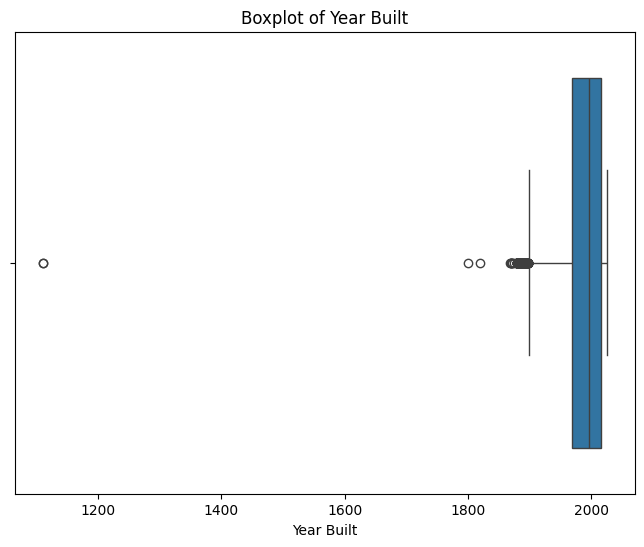

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year Built', data=df)
plt.title('Boxplot of Year Built')
plt.show()

In [22]:
# Calculate the lower quartile of 'Year Built'
Q1 = df['Year Built'].quantile(0.25)

# Filter the DataFrame for 'Year Built' less than the lower quartile
df_filtered = df[df['Year Built'] < Q1]

# Display the filtered DataFrame
df_filtered

,Property Type,Listing Status,Building Size(sq. m),Year Built,Bedrooms,Bathrooms,Num Floors,City,State,ZIP Code,USD Price
1,House,Active,247.49,1968,4.0,3.0,0.0,Park Rapids,North Dakota,56470,316000.0
2,House,Active,184.32,1914,4.0,2.0,0.0,Warroad,North Dakota,56763,350000.0
3,House,Active,172.61,1961,4.0,3.0,0.0,Chamberlain,North Dakota,57235,289000.0
9,House,Active,133.78,1951,2.0,2.0,0.0,Miltona,North Dakota,56354,599000.0
10,House,Active,195.10,1900,4.0,1.0,0.0,Parkers Prairie,North Dakota,56361,389000.0
...,...,...,...,...,...,...,...,...,...,...,...
19524,House,Active,160.35,1963,3.0,2.0,0.0,Luverne,South Dakota,56156,255000.0
19525,House,Active,295.90,1908,4.0,2.0,0.0,Edgerton,South Dakota,56128,181000.0
19528,House,Active,214.42,1955,4.0,3.0,0.0,Luverne,South Dakota,56156,299000.0
19529,House,Pending,115.20,1948,3.0,1.0,0.0,Chokio,South Dakota,56221,170000.0


In [23]:
df[df['Year Built'] == 1111]

,Property Type,Listing Status,Building Size(sq. m),Year Built,Bedrooms,Bathrooms,Num Floors,City,State,ZIP Code,USD Price
629,House,Active,22.3,1111,1.0,1.0,0.0,Miles City,Montana,59301,120000.0
9294,House,Active,22.3,1111,1.0,1.0,0.0,Miles City,North Dakota,59301,120000.0


In [24]:
df[df['Year Built'] < 1800]

,Property Type,Listing Status,Building Size(sq. m),Year Built,Bedrooms,Bathrooms,Num Floors,City,State,ZIP Code,USD Price
629,House,Active,22.3,1111,1.0,1.0,0.0,Miles City,Montana,59301,120000.0
9294,House,Active,22.3,1111,1.0,1.0,0.0,Miles City,North Dakota,59301,120000.0


In [25]:
# Drop rows where 'Year Built' is 1111
df = df[df['Year Built'] != 1111]

# Drop rows where 'Year Built' is less than 1800
df = df[df['Year Built'] >= 1800]

In [26]:
df.shape

(17974, 11)

In [27]:
df['ZIP Code'] = pd.to_numeric(df['ZIP Code'], errors='coerce').fillna(0).astype(int)

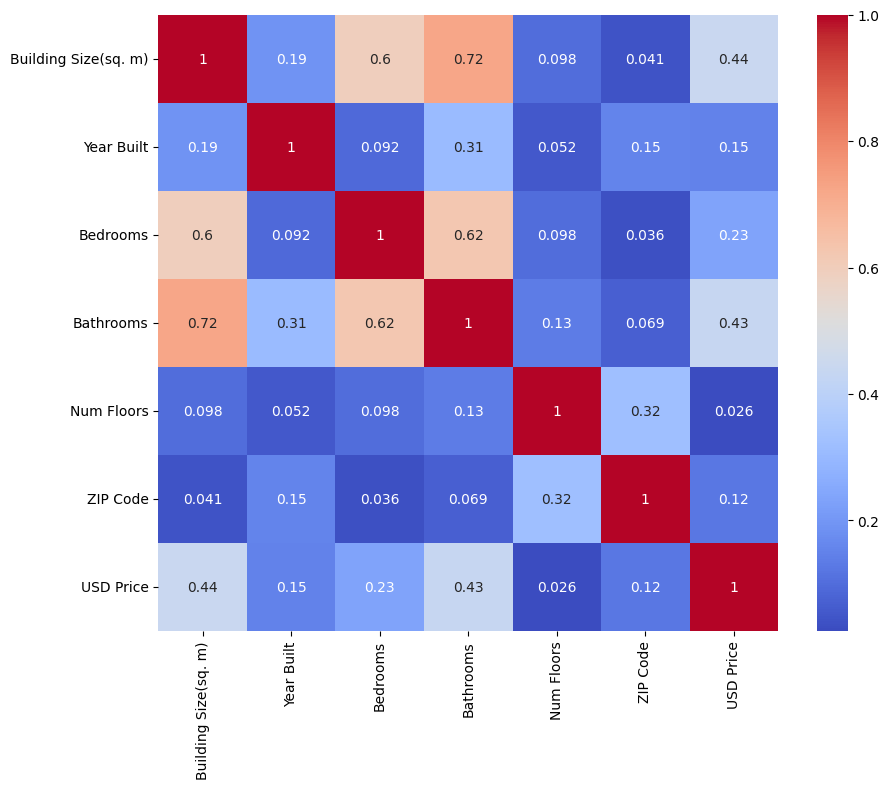

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##**Key Insights:**

###1. **Strong Positive Correlations:**

* **Building Size and Bathrooms (0.72):** Larger buildings tend to have more bathrooms.
* **Building Size and Bedrooms (0.6):** Larger houses typically have more bedrooms.
* **Bathrooms and Bedrooms (0.62):** Houses with more bedrooms often also have more bathrooms.

###2. **Moderate Positive Correlations:**

* **USD Price and Building Size (0.44):** Larger buildings generally command higher prices.
* **USD Price and Bathrooms (0.43):** Houses with more bathrooms tend to be more expensive.
* **Num Floors and Building Size (0.098):** While there's a positive correlation, it's relatively weak. This suggests that building size might increase in ways other than just adding more floors (e.g., larger floor areas).

###3. **Weak Correlations:**

* **Year Built** shows generally weak correlations with all other variables. This indicates that the age of a building doesn't strongly influence its size, number of bedrooms, bathrooms, number of floors, or price in this dataset.
* **ZIP Code** also displays weak correlations with most other variables, suggesting that location (as represented by ZIP code) isn't a major determining factor for these building characteristics and price.

4. **Other Notes:**

* **Num Floors** has very weak correlations with the number of bathrooms (0.13) and bedrooms (0.098).
* **USD Price and Num Floors (0.026):** This very weak correlation suggests that the number of floors has a minimal impact on the price.


<ipython-input-29-2d4f7c8d1e98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette="coolwarm")


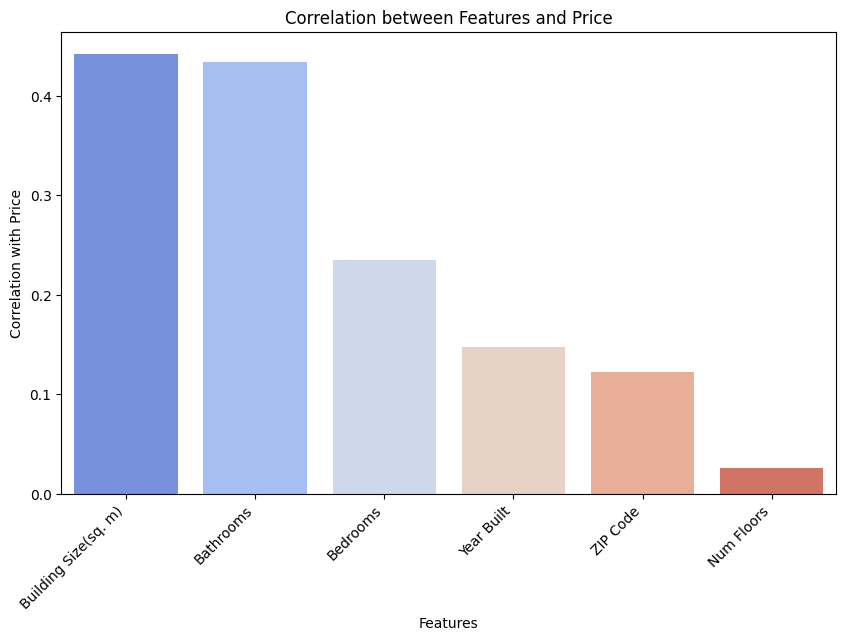

In [29]:
# Calculate correlations
corr = df.corr(numeric_only=True)['USD Price'].sort_values(ascending=False)[1:]  # Exclude 'price' itself

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))  # Optional: Adjust plot size
sns.barplot(x=corr.index, y=corr.values, palette="coolwarm")

# Customize the plot
plt.title('Correlation between Features and Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45, ha="right")  # Rotate x labels for readability

plt.show()

**Key Insights:**

1. **Strongest Positive Correlation:**
    - **Building Size (sq. m)** exhibits the highest positive correlation with Price. This indicates that as the size of the building increases, we can generally expect the price to increase as well.

2. **Moderately Strong Positive Correlation:**
    - **Bathrooms** also show a fairly strong positive correlation with Price. This suggests that houses with more bathrooms tend to have higher prices.

3. **Weak Positive Correlations:**
    - **Bedrooms** have a positive correlation with Price, but it's notably weaker than Building Size or Bathrooms.
    - **Year Built** displays a weak positive correlation, implying that newer houses might be associated with slightly higher prices in this dataset, but the relationship isn't very strong.

4. **Very Weak or No Correlation:**
    - **ZIP Code** and **Num Floors** have very low correlations with Price. This suggests that these factors have minimal influence on the price in this particular dataset.


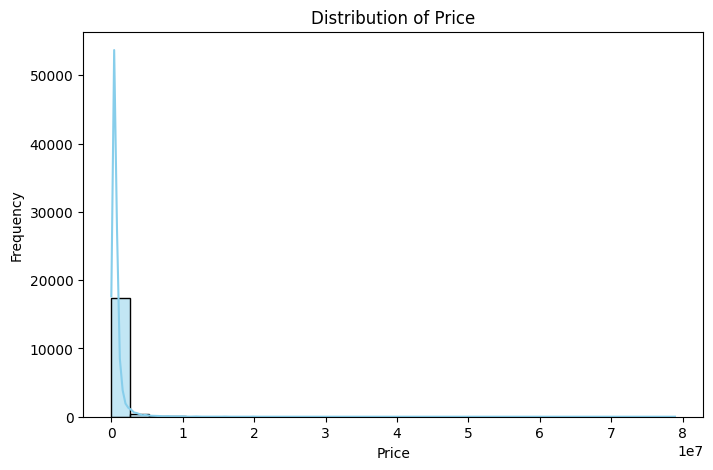

In [30]:
# Create Seaborn histogram with 30 bins
plt.figure(figsize=(8, 5))  # Optional: Adjust the figure size
sns.histplot(df['USD Price'], bins=30, kde=True, color='skyblue')

# Customize plot elements
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

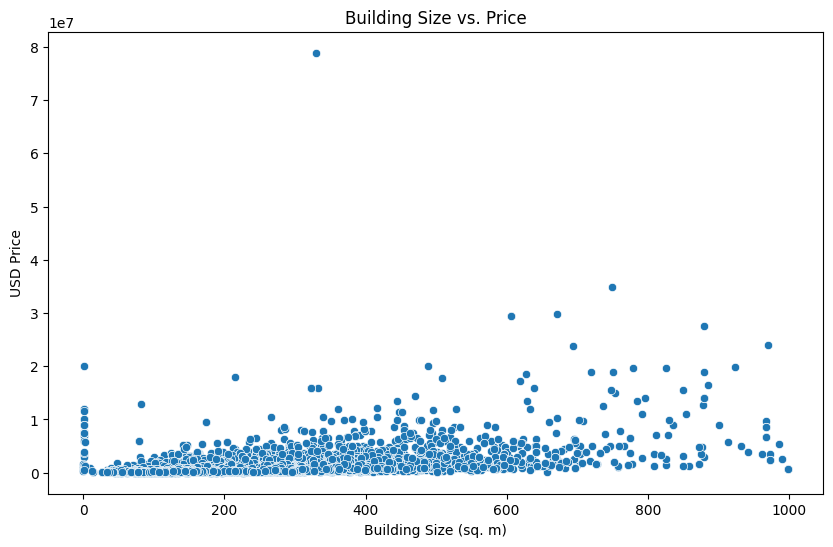

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Building Size(sq. m)', y='USD Price', data=df)
plt.title('Building Size vs. Price')
plt.xlabel('Building Size (sq. m)')
plt.ylabel('USD Price')
plt.show()

##**Overall Trend:**
* The plot depicts a **general positive correlation** between building size (sq. m) and USD Price. This suggests that as the building size increases, the price tends to increase as well.
* However, the relationship is not perfectly linear, and there's a considerable amount of **scatter** in the data points, indicating that other factors besides building size influence the price.

**Specific Observations:**

* **Majority of Data Points:** A large cluster of data points is concentrated in the lower left corner, signifying a predominance of smaller-sized buildings with lower prices.
* **Outliers:** There's one clear outlier with a building size around 400 sq. m and an exceptionally high price, significantly deviating from the general trend. This could represent a unique property with premium features or other factors driving up its price.
* **Price Variation:** For any given building size, there's a wide range of prices. This suggests that factors other than size, such as location, amenities, condition, and market demand, play a significant role in determining the final price.
* **Upper Limit on Size:** There seems to be an upper limit on the building size in the dataset, with very few properties exceeding 1000 sq. m.

**Possible Inferences:**

* Building size is a crucial factor influencing property prices, but it's not the sole determinant.
* The market likely includes a variety of properties, from smaller, more affordable options to larger, more expensive ones.
* The outlier suggests the presence of unique or luxury properties that command premium prices.
* Other factors beyond size significantly contribute to the price variation observed in the market.

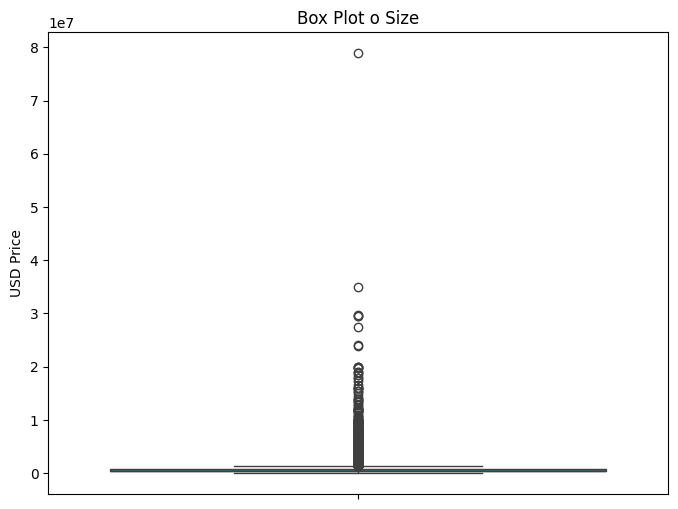

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['USD Price'])

plt.title('Box Plot o Size')

plt.show()

In [33]:
# Find the row with the highest USD Price
highest_price_row = df[df['USD Price'] == df['USD Price'].max()]
highest_price_row

,Property Type,Listing Status,Building Size(sq. m),Year Built,Bedrooms,Bathrooms,Num Floors,City,State,ZIP Code,USD Price
723,House,Active,330.08,2005,4.0,5.0,1.0,Bozeman,Montana,59715,78912000.0


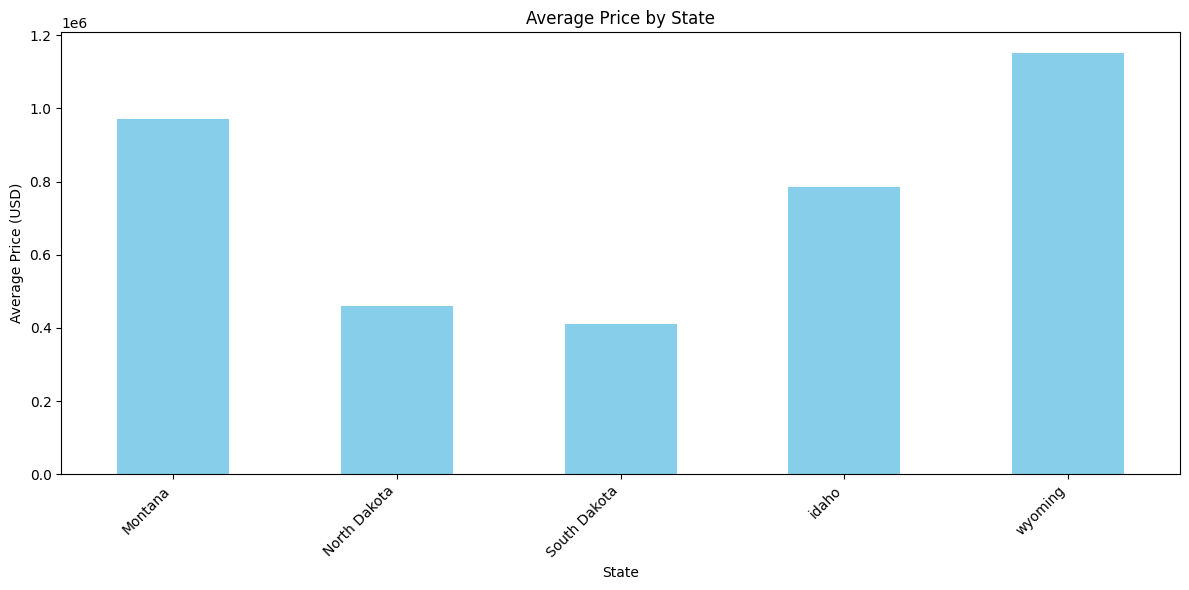

In [34]:
# Group by 'State' and calculate the average price
state_avg_price = df.groupby('State')['USD Price'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_avg_price.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Key Insights:**

1. **Price Disparity:** There's a significant variation in average property prices across the five states shown. Wyoming stands out with the highest average price, followed by Montana. On the other hand, South Dakota has the lowest average price.

2. **Specific Comparisons:**
    * **Wyoming vs. South Dakota:** The average price in Wyoming appears to be more than double that of South Dakota.
    * **Montana vs. North Dakota:** Montana has a slightly higher average price compared to North Dakota.
    * **Idaho vs. the Dakotas:** Idaho's average price falls somewhere between the higher prices of Wyoming and Montana and the lower prices of North and South Dakota.

**Possible Inferences:**

* **Wyoming's Real Estate Market:** The substantially higher average price in Wyoming could suggest a more competitive market, potentially driven by factors like high demand, limited supply, or a greater proportion of luxury properties.
* **Affordability in South Dakota:** South Dakota's lower average price might indicate a more affordable housing market, potentially attractive to budget-conscious buyers or those seeking a lower cost of living.
* **Other Factors at Play:** It's crucial to remember that this chart only shows average prices. Many other factors influence real estate prices, including property types, location within the state, economic conditions, and more. So, it's essential to interpret these averages with caution.



In [35]:
df['State'].unique()

array(['North Dakota', 'Montana', 'South Dakota', 'wyoming', 'idaho'],
      dtype=object)

In [36]:
# Filter the DataFrame for 'State' equal to 'Montana'
montana_df = df[df['State'] == 'Montana']

# Get the distinct ZIP codes in Montana
distinct_zip_codes = montana_df['ZIP Code'].unique()
distinct_zip_codes.shape

(221,)

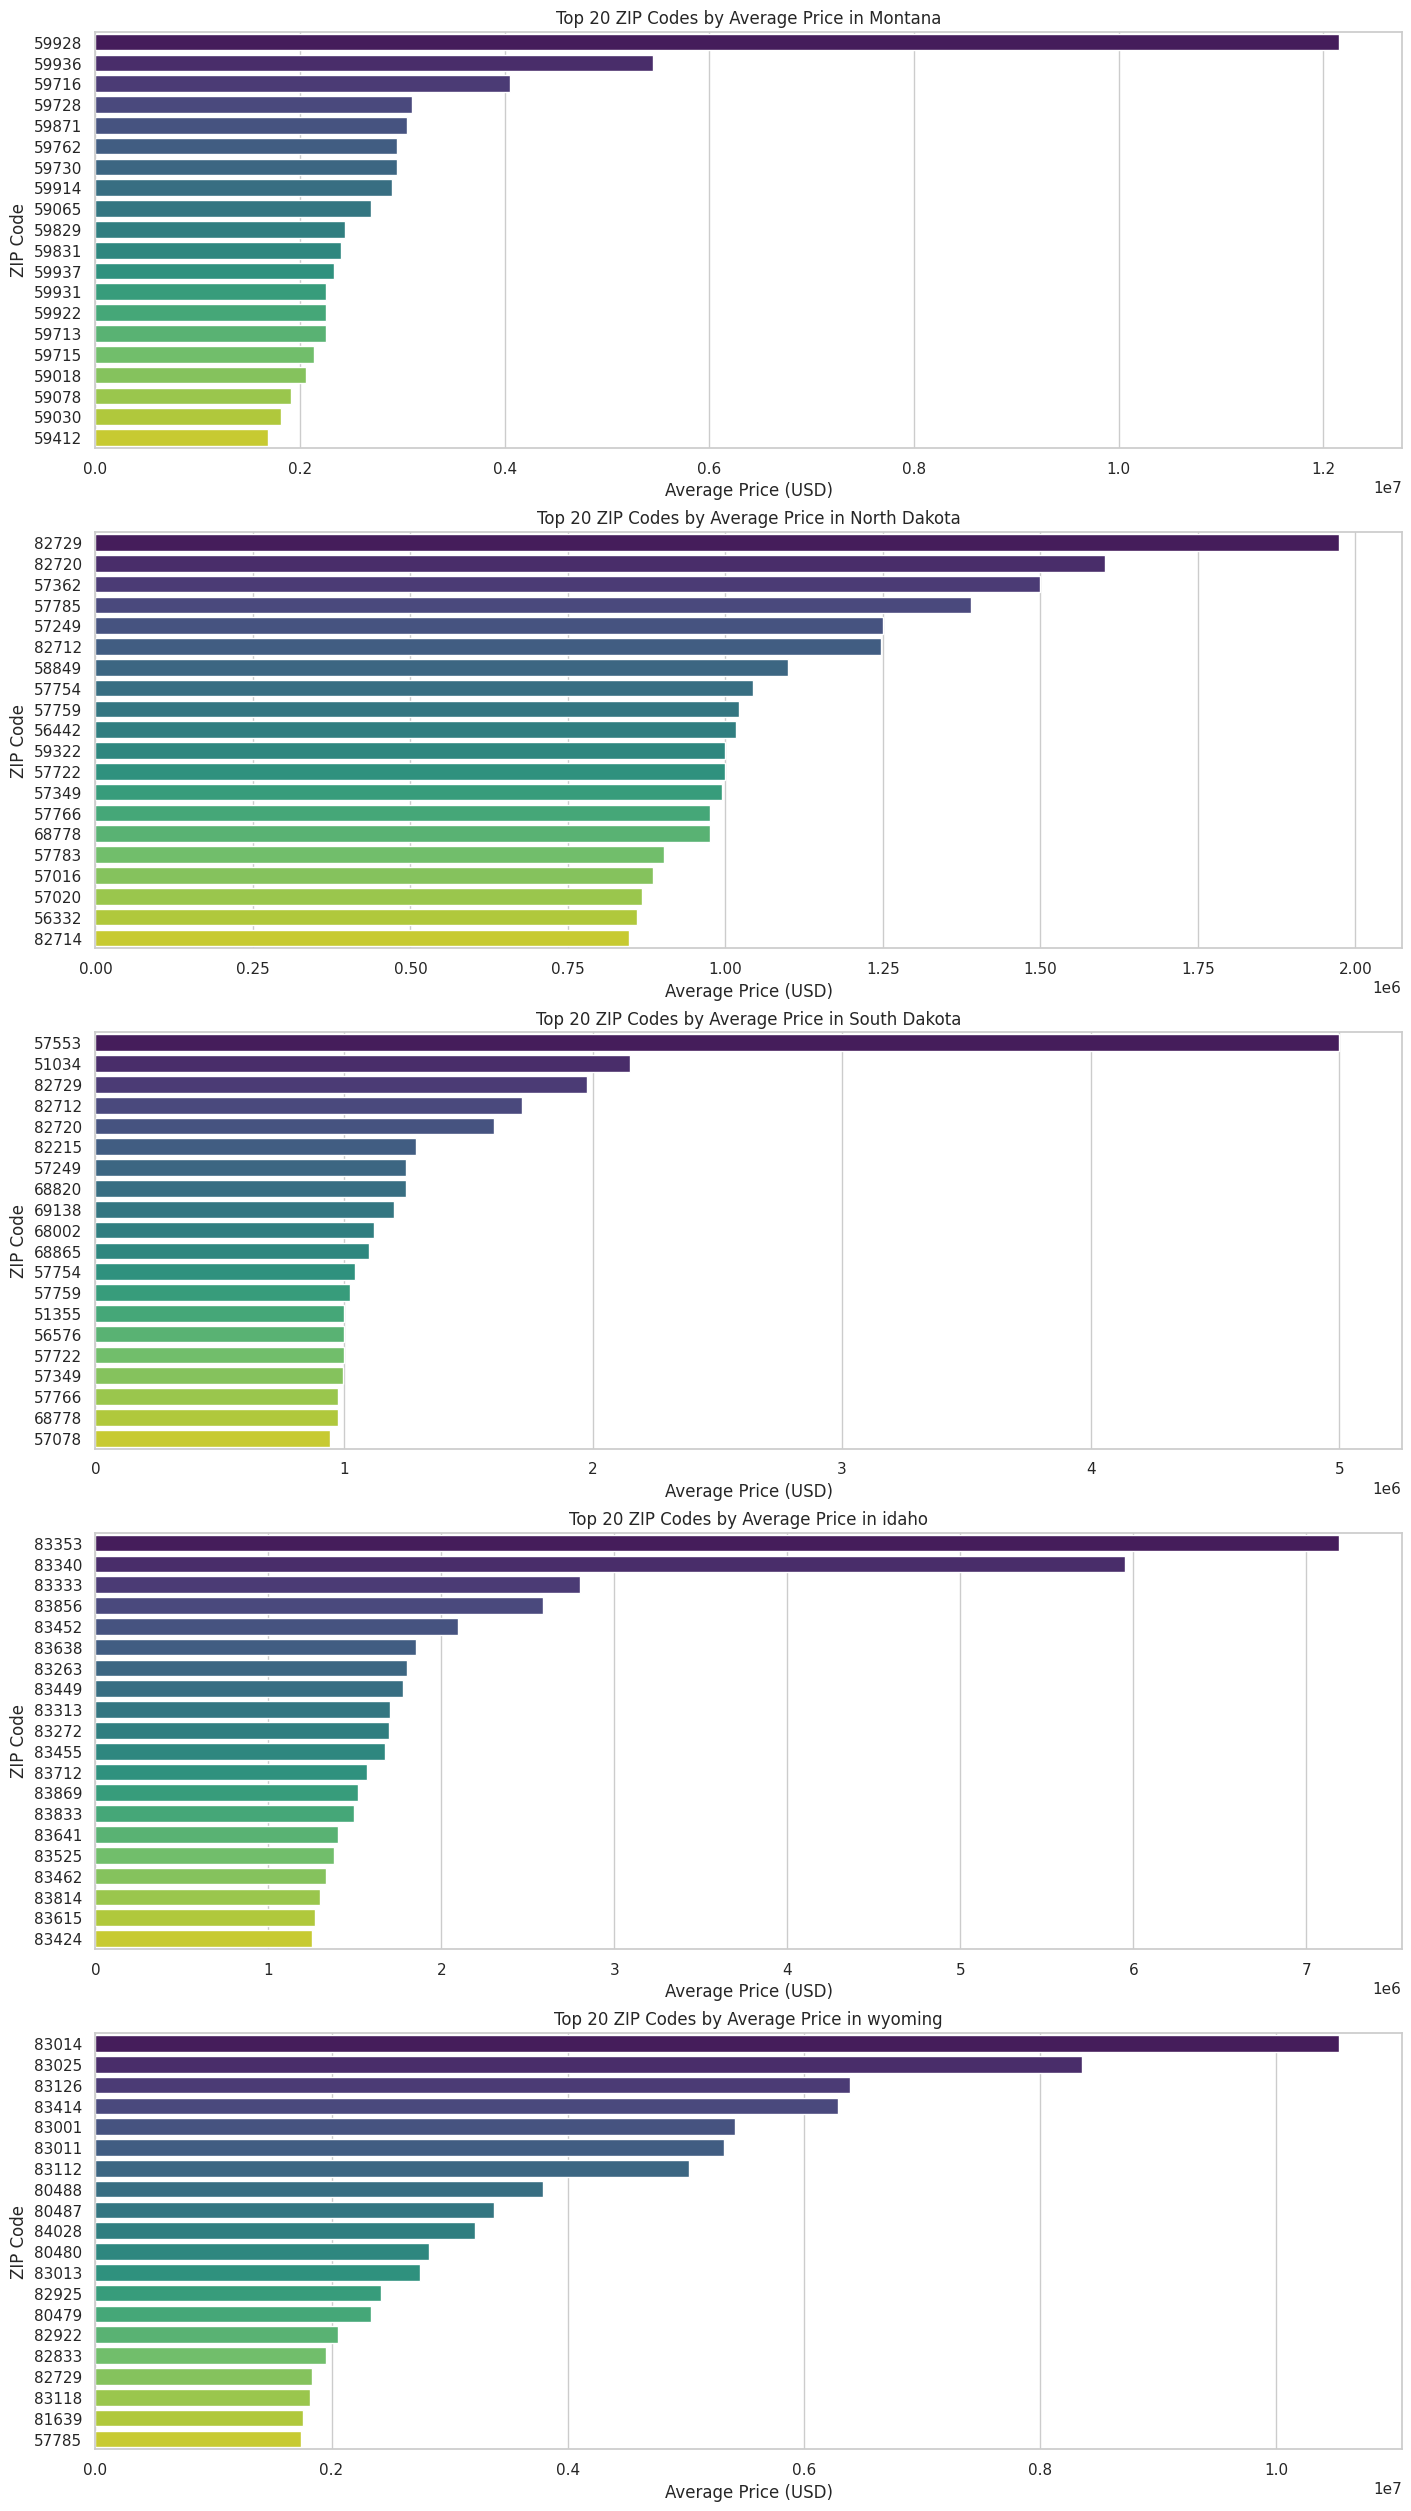

In [37]:
df['ZIP Code'] = df['ZIP Code'].astype(str)

# Group by 'State' and 'ZIP Code', and calculate the average price for each ZIP Code
avg_price_per_zip = df.groupby(['State', 'ZIP Code'])['USD Price'].mean().reset_index()

# For each state, find the top 20 ZIP codes by average price
top_20_zipcodes_per_state = avg_price_per_zip.groupby('State').apply(
    lambda x: x.nlargest(20, 'USD Price')).reset_index(drop=True)

# Plotting
states = top_20_zipcodes_per_state['State'].unique()

# Set up the visualizations
sns.set(style="whitegrid")

# Generate plots for each state
fig, axes = plt.subplots(len(states), 1, figsize=(14, 5 * len(states)), constrained_layout=True)

if len(states) == 1:
    axes = [axes]  # Ensure axes is always iterable

for i, state in enumerate(states):
    state_data = top_20_zipcodes_per_state[top_20_zipcodes_per_state['State'] == state]
    sns.barplot(ax=axes[i], data=state_data, x='USD Price', y='ZIP Code', hue='ZIP Code', legend=False, palette="viridis")
    axes[i].set_title(f"Top 20 ZIP Codes by Average Price in {state}")
    axes[i].set_xlabel("Average Price (USD)")
    axes[i].set_ylabel("ZIP Code")

# Show the updated plots
plt.show()

###**Overall Observations:**

1. **Price Range Disparity:**
   - **Wyoming & Montana:** The average property prices in Wyoming and Montana are considerably higher than the other states. The price range in these states extends well beyond 1 million USD, with some ZIP codes reaching close to 2 million USD.
   - **South Dakota:**  In stark contrast, South Dakota has the most affordable housing market among the five states. The average prices in its top ZIP codes appear to be below 200,000 USD.
   - **North Dakota & Idaho:**  These two states occupy a middle ground in terms of average property prices, with ranges falling between those of the aforementioned states.

2. **Within-State Variation:**
   - While there are clear distinctions in average price ranges between states, there's also noticeable variation within each state.
   - In Wyoming and Montana, particularly, the difference between the highest and lowest average prices among the top 20 ZIP codes is substantial. This suggests a greater degree of price segmentation within these markets, potentially influenced by factors like location desirability, property types, or amenities.

**Possible Inferences (with Cautions):**

- **Market Dynamics:**
    - Wyoming and Montana likely have more competitive and potentially exclusive real estate markets, possibly driven by factors like high demand, scenic locations, or a greater proportion of luxury properties.
    - South Dakota's market appears to be more accessible, likely attracting budget-conscious buyers or those seeking a lower cost of living.
    - North Dakota and Idaho offer a mix of affordability and higher-priced options, potentially catering to a wider range of buyers.

- **Location Significance:**
    - The within-state price variations underline the importance of location even within a specific state. Certain ZIP codes within each state command a premium, possibly due to factors like proximity to urban centers, natural amenities, or school districts.


<ipython-input-38-527c09098474>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zipcodes_per_state, x='USD Price', y='State', palette="viridis")


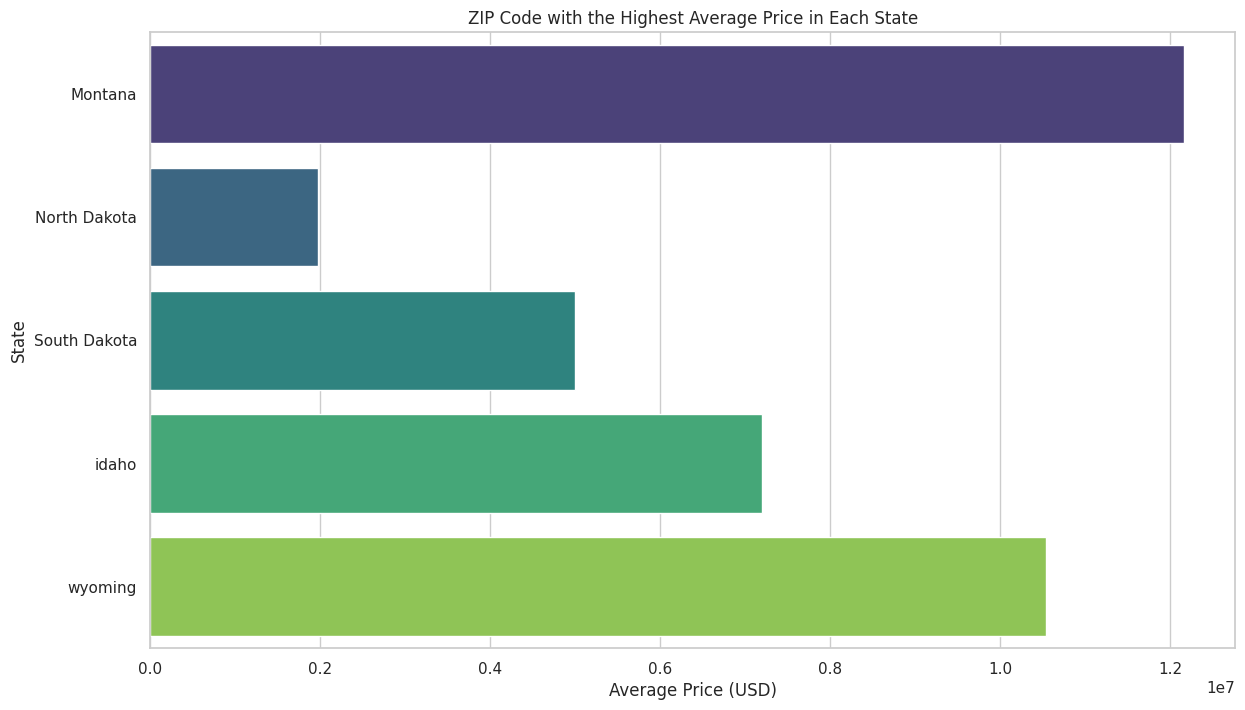

In [38]:
# Calculate the average price for each ZIP code
avg_price_per_zip = df.groupby(['State', 'ZIP Code'])['USD Price'].mean().reset_index()

# Select the ZIP code with the highest average price for each state
top_zipcodes_per_state = avg_price_per_zip.loc[avg_price_per_zip.groupby('State')['USD Price'].idxmax()]

# Plotting the top ZIP codes for each state
plt.figure(figsize=(14, 8))
sns.barplot(data=top_zipcodes_per_state, x='USD Price', y='State', palette="viridis")
plt.title('ZIP Code with the Highest Average Price in Each State')
plt.xlabel('Average Price (USD)')
plt.ylabel('State')
plt.show()


##**Key Insights**

1. **Significant Price Disparity**: There's a considerable difference in the average price of the most expensive ZIP codes across the five states shown. Montana stands out with the highest average price, followed by Wyoming. South Dakota has the lowest average price among these states.

2. **State Comparisons**:

* **Montana:** The average price in the most expensive ZIP code in Montana is significantly higher than in any other state, approaching 1.2e7 (or $12 million).
* **Wyoming**: The second-highest average price is found in Wyoming, although it is notably lower than Montana's.
* **Idaho**: The average price in Idaho's priciest ZIP code falls somewhere in the middle, below Wyoming but considerably above both Dakotas.
* **North and South Dakota:** These two states exhibit the lowest average prices for their most expensive ZIP codes, with South Dakota being notably lower than North Dakota.

**Possible Inferences**:

* **Montana's High-End Market:** The substantially higher average price in Montana's top ZIP code could suggest a very exclusive and competitive luxury real estate market.
* **Affordability in the Dakotas:** The lower average prices in the Dakotas, particularly South Dakota, might indicate a more affordable housing market overall.
* **Variations within States:** While this chart highlights the most expensive ZIP codes, it's important to remember that there will be significant price variations within each state.


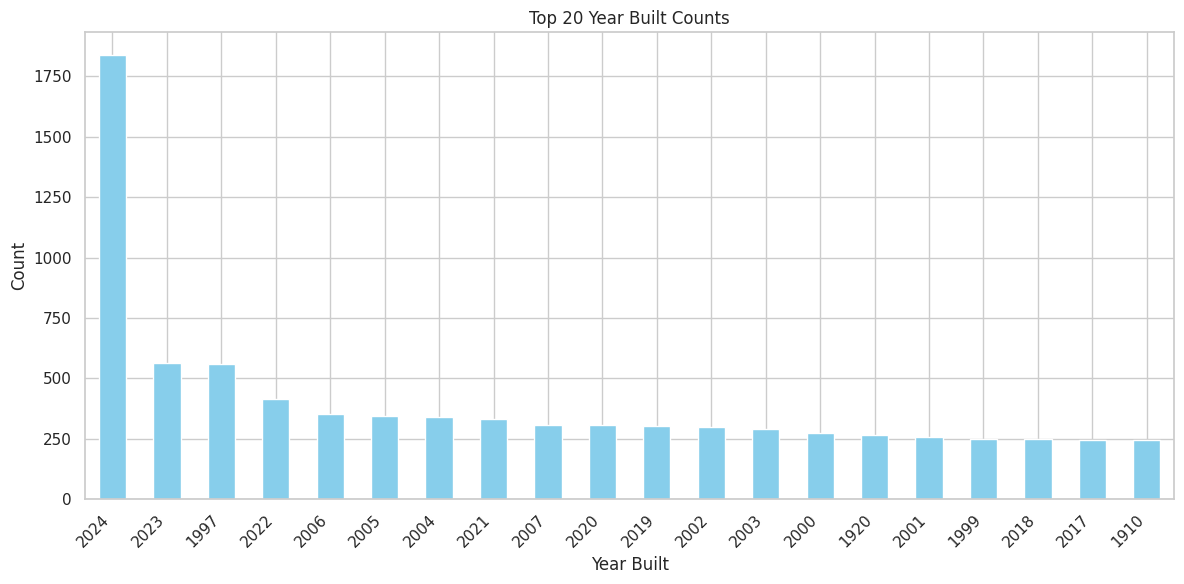

In [39]:
# Count the occurrences of each 'Year Built' value
year_built_counts = df['Year Built'].value_counts().nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
year_built_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Top 20 Year Built Counts')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##**Overall Trend:**

* The chart shows a clear **dominance of recent construction.** The year 2024 has the highest count by a significant margin, suggesting a large number of new buildings or listings in the dataset.
* Following 2024, there is a general **decreasing trend in the count of buildings as we go back in time.** This indicates that newer constructions are more prevalent in the data.

**Specific Observations:**

* **Recent Years:** The years 2023, 2022, and 2021 also have relatively high counts, further emphasizing the trend towards recent construction.
* **Older Years:** While the counts for older years are lower, there's a notable spike for the year 1920. This could indicate a specific set of historical buildings or a data anomaly worth investigating further.
* **Distribution:** The counts for most years between 2000 and 2020 appear fairly evenly distributed, suggesting a relatively consistent level of construction or listings during that period.

**Possible Inferences:**
* The high count for recent years could reflect a boom in construction or an increase in the number of new properties entering the market.
* The presence of older buildings (like those from 1920) adds diversity to the dataset and might indicate a market with a mix of historical and modern properties.

In [40]:
df['Bedrooms'].value_counts()

,count
Bedrooms,
3.0,7411
4.0,4724
2.0,2569
5.0,2109
6.0,553
1.0,376
7.0,141
8.0,44
10.0,16


<ipython-input-41-bfc69e8d581c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bedrooms', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars


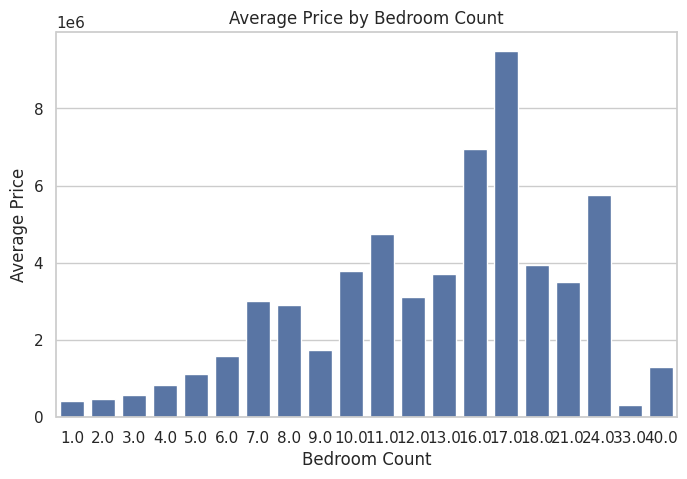

In [41]:
# Group by and aggregation
grouped_df = df.groupby('Bedrooms')['USD Price'].mean().reset_index()

# Create the Seaborn bar plot
plt.figure(figsize=(8, 5))  # Optional: Adjust figure size
sns.barplot(x='Bedrooms', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars

# Customize the plot
plt.title('Average Price by Bedroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Average Price')

# Show the plot
plt.show()

###**General Trend:**

* **Clear Positive Correlation:** Overall, there's a clear upward trend — as the number of bedrooms increases, the average price also tends to increase. This is intuitive, as larger homes with more bedrooms are generally expected to be more expensive.

**Specific Observations:**

* **Sharp Increase at 18 Bedrooms:**  There is a dramatic spike in average price at 18 bedrooms. This suggests that properties with 18 bedrooms are likely very high-end or luxury properties, significantly impacting the average price for that category.
* **Slight Dip After Peak:** After the peak at 18 bedrooms, there's a slight decrease in average price for properties with more bedrooms. This could be due to a smaller sample size for these larger homes, leading to more variability in the average.
* **Lower Price for Fractional Bedroom Counts:**  The chart includes some fractional bedroom counts (e.g., 0.24, 0.33, 0.40). These likely represent studios or unique property types, and their average prices tend to be lower, as expected.
* **Steady Increase Up to 18 Bedrooms:**  From 1 bedroom to 18 bedrooms, there's a fairly consistent increase in average price with each additional bedroom, although the rate of increase might vary slightly.

**Possible Inferences:**

* The data likely represents a real estate market where larger homes command significantly higher prices.
* The presence of fractional bedroom counts suggests some diversity in the property types included in the data.
* The outlier at 18 bedrooms highlights the potential presence of luxury properties or a unique market segment.

<ipython-input-42-793ac570b79f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bathrooms', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars


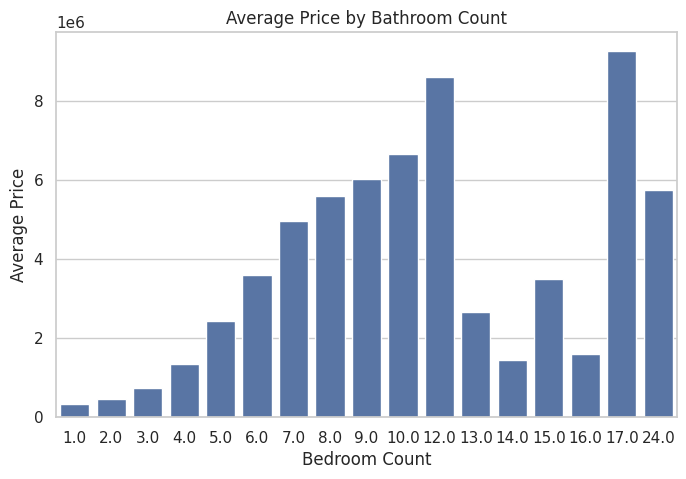

In [42]:
# Group by and aggregation
grouped_df = df.groupby('Bathrooms')['USD Price'].mean().reset_index()

# Create the Seaborn bar plot
plt.figure(figsize=(8, 5))  # Optional: Adjust figure size
sns.barplot(x='Bathrooms', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars

# Customize the plot
plt.title('Average Price by Bathroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Average Price')

# Show the plot
plt.show()


###**General Trend:**

* **Clear Positive Correlation:** Overall, there's a clear upward trend — as the number of bedrooms increases, the average price also tends to increase. This is intuitive, as larger homes with more bedrooms are generally expected to be more expensive.

**Specific Observations:**

* **Sharp Increase at 17 Bedrooms:** There is a dramatic spike in average price at 17 bedrooms. This suggests that properties with 17 bedrooms are likely very high-end or luxury properties, significantly impacting the average price for that category.
* **Slight Dip After Peak:** After the peak at 17 bedrooms, there's a noticeable decrease in average price for properties with 24 bedrooms. This could be due to a smaller sample size for these larger homes, leading to more variability in the average, or other factors such as location or property type influencing the price.
* **Steady Increase Up to 17 Bedrooms:** From 1 bedroom to 17 bedrooms, there's a fairly consistent increase in average price with each additional bedroom, although the rate of increase might vary slightly.
* **Lower Prices for Fractional Bedroom Counts:** The chart includes some fractional bedroom counts (e.g., 0.24, 0.33, 0.40). These likely represent studios or unique property types, and their average prices tend to be lower, as expected.

**Possible Inferences:**

* The data likely represents a real estate market where larger homes command significantly higher prices.
* The presence of fractional bedroom counts suggests some diversity in the property types included in the data.
* The outlier at 17 bedrooms highlights the potential presence of luxury properties or a unique market segment.

<ipython-input-58-b28531728b14>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Num Floors', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars


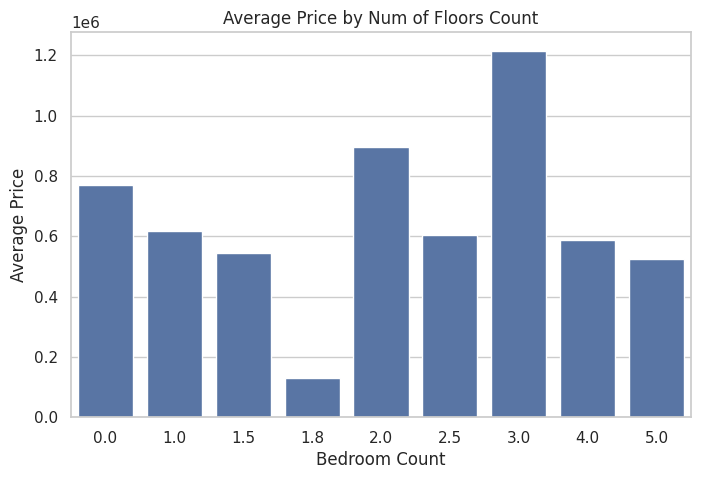

In [58]:
# Group by and aggregation
grouped_df = df.groupby('Num Floors')['USD Price'].mean().reset_index()

# Create the Seaborn bar plot
plt.figure(figsize=(8, 5))  # Optional: Adjust figure size
sns.barplot(x='Num Floors', y='USD Price', data=grouped_df, ci=None)  # ci=None removes error bars

# Customize the plot
plt.title('Average Price by Num of Floors Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Average Price')

# Show the plot
plt.show()

##**General Trend:**

* **Relationship between Number of Floors and Price:** The relationship between the number of floors and average price isn't strictly linear. There are fluctuations, but generally, properties with more floors tend to have a higher average price, with a notable exception at 1.8 floors.

**Specific Observations:**

* **Highest Average Price:** Properties with 3.0 floors have the highest average price.
* **Lowest Average Price:** Properties with 1.8 floors have the lowest average price. This could be due to several factors like smaller sample size, specific property types with 1.8 floors being less desirable, or other confounding variables not shown in the chart.
* **Increase then Plateau:** There is a general increase in average price from 0.0 to 3.0 floors. After 3.0 floors, the average price seems to plateau with some minor fluctuations.


#**It's clear that no single factor is solely responsible for determining house prices.**

Here's a recap of the key takeaways that support this conclusion:

* **Building Size and Price:** While there is a general positive correlation between building size and price, the scatter plot also revealed significant price variation for properties of similar sizes. This indicates that other factors beyond size are at play.

* **Number of Bedrooms and Price:** A similar pattern is observed with the number of bedrooms. Although more bedrooms generally lead to higher prices, there are exceptions and fluctuations, particularly at the higher end.

* **Number of Floors and Price:** The relationship between the number of floors and price is not strictly linear, showing an initial increase followed by a plateau and some fluctuations. This suggests that the number of floors is just one of many contributing factors.

* **Year Built and ZIP Code:** These factors showed weak correlations with price, indicating that they might have less influence on the final price compared to other attributes.